# RV calculation at specific times.

To determine the RV of the planets expected in my atmospheres

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

import sys
#sys.path.append('/home/jneal/azores/planet/rvs/exonailer/utilities')
import ajplanet
from ajplanet import pl_rv_array
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [37]:
#Rodrigo Diaz's true anomaly calculation

import numpy as np

def trueanomaly(ma, ecc, niterationmax=10000):
    """
    Compute the true anomaly using the Newton-Raphson method.

    :param array-like ma: mean anomaly.
    :param float ecc: orbital eccentricity.
    :param int niterationmax: maximum number of iterations for N-R method.
    """
    
    if not isinstance(ma, float):
        ea = ma
    else:
        ea = np.array([ma,])

    # Initialise at ea0 = ma
    niteration = 0
    ea0 = ma
    
    while np.linalg.norm(ea - ea0, ord=1) > 1e-5 or niteration==0:
        ea0 = ea
 
        ff = ea - ecc*np.sin(ea) - ma   # Function
        dff = 1 - ecc*np.cos(ea)        # Derivative

        # Use Newton method
        ea = ea0 - ff / dff

        # Increase iteration number; if above limit, break with exception.
        niteration += 1
        if niteration >= niterationmax:
            raise RuntimeError('Eccentric anomaly computation'
                               'not converged.')
        
    # Compute true anomaly from eccentric anomaly
    return 2. * np.arctan2(np.sqrt(1. + ecc) * np.sin(ea/2.),
                           np.sqrt(1. - ecc) * np.cos(ea/2.))

# Maen Anomaly calculation
def meananomaly(t, T0, P):
    """ Calculate mean Anomaly using period, tau and a time value"""
    if not isinstance(t, np.ndarray):
        t = np.array(t)
    return 2 * np.pi * (t - T0) / P

def radialvelocity(gamma, K, ta, omega, ecc):
    # Calculate radial velocity of star
    return gamma + K *(np.cos(ta + omega) + ecc * np.cos(omega))

def rv_curve_py(t, gamma, K, omega, ecc, T, P):
    ma = meananomaly(t, T, P)
    ta = trueanomaly(ma, ecc)
    rv = radialvelocity(gamma, K, ta, omega, ecc)
    return rv
    
    

In [38]:
#turn 1997.04 +- 0.02 into julian days
print(0.04 * 365)
print(.6*24)
print(.4*60)
# Julian date for CE  1997 January 14 14:24:00.0 UT is
# JD 2450463.100000

14.6
14.4
24.0


# Keplerian Orbital Parameters:

In [39]:

#Target parameters:  Obtained from sahlmann et al.
#                 [mean_val, K1, omega, e, Tau, Period]

#HD4747_params   = [9.904, 703.3, -94.2, 0.723, 62059.1, 11593.2] # Best fit solution from sahlmann not complete period coverage
#Crepp 2016 updated HD4747 parameters  t = 1997.04

HD4747_params   = [-0.219, 755.3, -69.1, 0.740, 50463.10, 37.88*365.25] 
HD162020_params = [-27.328, 1813, 28.40, 0.277, 51990.677, 8.428198]  # here mean val in km/s K in m/s https://arxiv.org/pdf/astro-ph/0202458v2.pdf
HD167665_params = [8.003, 609.5, -134.3 ,0.340, 56987.6, 4451.8]  # sahlman
HD211847_params = [6.689, 291.4, 159.2, 0.685, 62030.1, 7929.4]  # Best fit solution from sahlmann not complete period coverage
HD30501_params =  [23.710, 1703.1, 70.4, 0.741, 53851.5, 2073.6]  # sahlman


# 2 companions
# One of these used 3 body equations - need to compare relative strengths
HD168443b_params = [-0.046533, 475.133, 172.923, 0.52883, 15626.199, 58.1125] #  % msini = 7.659Mjp, a=0.2931AU, dv/dt (ms−1 yr−1) −0.00868
HD168443c_params = [-0.046533, 297.70, 64.87, 0.2113, 15521.3, 1749.83] 
#singal companion- old model
#HD202206_params = [14.681, 564.8, 160.32, 0.429, 51919.02, 256.003] #drift of 42.9 ms per year!    # here mean val in km/s K in m/s
HD202206b_params = [14.721, 564.75, 161.18, 0.435, 52250.00, 255.87] #\citet{Correia2005_hd202206bc}\\  % \lambda = 266.228 deg (mean longitude)
HD202206c_params = [14.721, 42.01, 78.9, 0.267, 52250.00, 1383.4] # \citet{Correia2005_hd202206bc}\\ % \lambda = 30.586 deg (mean longitude)


#Median times 
# extremeties are +- 14 minutes
HD30501_times =  [2456024.505902, 2456140.88716, 2456141.86633, 2456145.904258]  # from data - need to double check with calculated data centers
HD162020_times = [2456112.76624, 2456112.79015]
HD202206_times = [ 2456120.78801, 2456121.73727, 2456119.85411]   
HD211847_times = [0, 2456121.78793]   # Need to find out the first value here. 
HD4747_times =   [2456114.81674]
HD167665_times = [2456136.70895, 2456136.73434, 2456144.62087] 
HD168443_times = [2456144.68718, 2456144.70753]
params_dict = {"HD30501":HD30501_params, "HD211847":HD211847_params, \
               "HD4747":HD4747_params, "HD167665":HD167665_params, \
               "HD162020":HD162020_params, \
               "HD202206b":HD202206b_params,"HD202206c":HD202206c_params, \
               "HD168443b":HD168443b_params,"HD168443c":HD168443c_params}
               # "HD202206":HD202206_params,
    
times_dict = {"HD30501":HD30501_times, "HD162020":HD162020_times, \
              "HD202206":HD202206_times, "HD211847":HD211847_times, \
              "HD4747":HD4747_times, "HD167665":HD167665_times, \
             "HD168443":HD168443_times}


In [114]:
def RV_from_params(t, params, use_offset=True):
    """ Get RV values with parameter list.
    
    input:
        t -- The time/s at which to calculate the RV value
        params -- a list of values [mean_val, K1, omega, e, Tau, Period]
    
    omega should be given in degrees. This function converts it to radians.
    
    Outputs:
        RVs -- The radial velocity values evaluated at the given times.
    
    """
    if not isinstance(t, np.ndarray):
        t = np.array(t)
        
    params = params[:]
    params[2] = np.deg2rad(params[2])
    
    if not use_offset:
        params[0] = 0
    else:
        params[0] = params[0] * 1000 # Turn into m/s
    #print(params)
    # Note: test that is np.deg2rad is faster than *np.pi /180
    try: # Try rv_curve first
        #import ajplanet
        RVs = pl_rv_array(t, *params) # *unpacks parameters from list
        #print("used ajplanet")
    except:
        RVs = rv_curve_py(t, *params) # *unpacks parameters from list
        #print("used python")
    return RVs


def plot_RV_phase_curve(params, name=False, t_vals=False, use_offset=False):
    """Plot RV phase curve use period and T0 to get times from phase.
    
    params -- a list of values [mean_val, K1, omega, e, Tau, Period]"""
    
    phase = np.linspace(-0.1,1.1, 200)
    t = params[4] + phase*params[5]
    
    rv_values = RV_from_params(t, params)
    
    plt.figure()
    plt.plot(phase, rv_values)
    if name:
        plt.title("RV Phase curve for {}".format(name))
    else:
        plt.title("RV Phase curve")
    if t_vals:
        for t_num, t_val in enumerate(t_vals):
            phi = (t_val - params[4])/params[5]  % 1
            rv = RV_from_params(t_val, params)
            plt.plot(phi, rv, "+",label = "Obs #{0}".format(t_num), markersize=16, markeredgewidth=3)
            plt.legend(loc=0)
    plt.xlabel("Phase")
    plt.ylabel("RV amplitude (m/s)")
    plt.show()

    
def test_rv_curves(t, params):
    
    if not isinstance(t, np.ndarray):
        t = np.array(t)
    else:
        pass
    params = params[:]
    params[2] = np.deg2rad(params[2])
    params[0] = 0

    aj_rv = pl_rv_array(t, *params) # *unpacks parameters from list
    
    py_rv = rv_curve_py(t, *params)
    
    print("Ajplanet RVs = {}".format(aj_rv))
    print("Python RVs   = {}".format(py_rv))
    return None


def Obs_RV_error(t, params, name=False ):
    
    obs_time_sigma = 14/(60*24)  # +-14min
    
    if not isinstance(t, np.ndarray):
        t = np.array(t)
    
    t_start = t - obs_time_sigma
    t_end =  t + obs_time_sigma
    
    RV_start = RV_from_params(t_start, params, use_offset=False)
    RV_end = RV_from_params(t_end, params, use_offset=False)
    
    RV_difference = RV_end - RV_start 
    
    #if name:
        #print("RV change over observation for {} m/s".format(RV_difference))
    return RV_difference

def RV_calculations(times, params, use_offset=False):
    
    for target in times:
        print("\nTarget {}".format(target))
        time = times[target]
       
        
        if target in ["HD202206", "HD168443"]:
            targetb = target + "b" 
            targetc = target + "c"
            paramb = params[targetb]
            paramc = params[targetc]
            
            rv_values = RV_from_params(time, paramb, use_offset=use_offset)
            rv_values_c = RV_from_params(time, paramc, use_offset=use_offset)
            rv_diff_b = Obs_RV_error(time, paramb, name=targetb)
            rv_diff_c = Obs_RV_error(time, paramc, name=targetc)
            print("Gamma subtracted RV values for b = {0} m/s".format(rv_values))
            print("RV change over exptime for b     = {0} m/s".format(rv_diff_b))
            print("Gamma subtracted RV values for c = {0} m/s".format(rv_values_c))
            print("RV change over exptime for c     = {0} m/s".format(rv_diff_c))
            print("Combined RV value for triplet    = {0} m/s".format(rv_values + rv_values_c))
            
            plot_RV_phase_curve(paramb, name=targetb, t_vals=time, use_offset=False)
            plot_RV_phase_curve(paramc, name=targetc, t_vals=time, use_offset=False)
            
        else:
            param = params[target]   
                                
            rv_values = RV_from_params(time, param, use_offset=use_offset)
            rv_diff = Obs_RV_error(time, param, name=target)
            
            print("Gamma subtracted rv values = {0} m/s".format(rv_values))
            print("RV change over exptime     = {0} m/s".format(rv_diff))
            
            plot_RV_phase_curve(param, name=target, t_vals=time, use_offset=False)
            
            
    return None




Target HD4747
Gamma subtracted rv values = [-482.37561097] m/s
RV change over exptime     = [-0.00203258] m/s


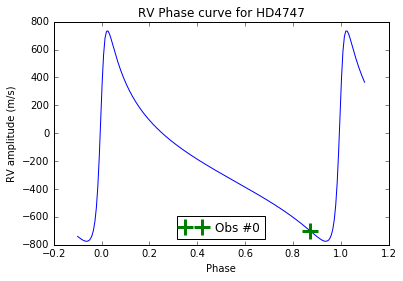


Target HD30501
Gamma subtracted rv values = [-246.88768364 -122.27137959 -121.21000561 -116.82986697] m/s
RV change over exptime     = [ 0.02066453  0.02107387  0.02107985  0.02110496] m/s


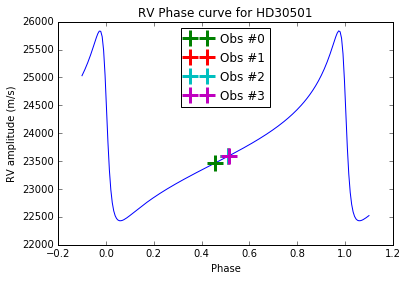


Target HD167665
Gamma subtracted rv values = [-737.64314371 -737.65153864 -740.16865358] m/s
RV change over exptime     = [-0.0064298  -0.00642839 -0.005981  ] m/s


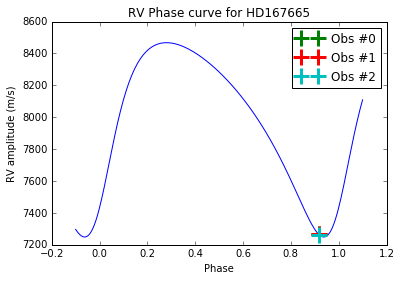


Target HD202206
Gamma subtracted RV values for b = [ -84.45732826 -103.1758047   -66.71647183] m/s
RV change over exptime for b     = [-0.37629444 -0.39060286 -0.36251123] m/s
Gamma subtracted RV values for c = [ 19.019063    19.13201534  18.90792277] m/s
RV change over exptime for c     = [ 0.00231386  0.00231352  0.00231417] m/s
Combined RV value for triplet    = [-65.43826526 -84.04378935 -47.80854907] m/s


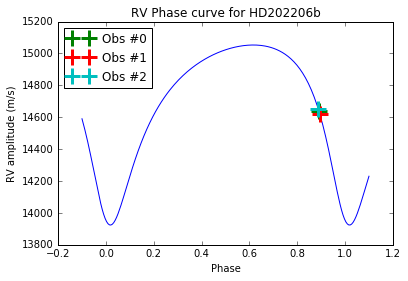

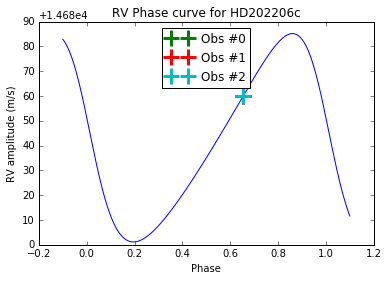


Target HD162020
Gamma subtracted rv values = [-1258.28312777 -1251.52542645] m/s
RV change over exptime     = [ 5.42134508  5.5697078 ] m/s


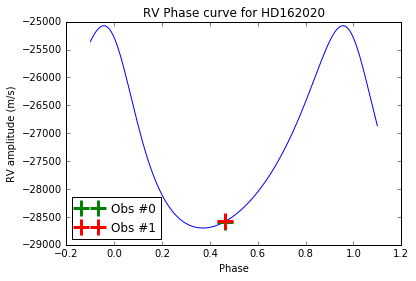


Target HD211847
Gamma subtracted rv values = [-37.78937923  -6.34781552] m/s
RV change over exptime     = [ 0.00214781 -0.00576619] m/s


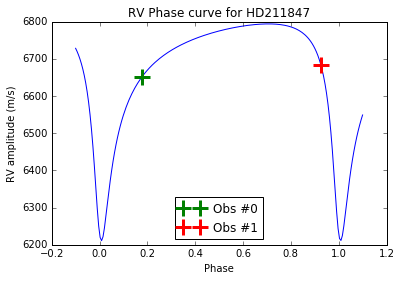


Target HD168443
Gamma subtracted RV values for b = [ 211.40576895  211.49986415] m/s
RV change over exptime for b     = [ 0.09006337  0.0897528 ] m/s
Gamma subtracted RV values for c = [ 256.45003189  256.46333491] m/s
RV change over exptime for c     = [ 0.01271141  0.01271071] m/s
Combined RV value for triplet    = [ 467.85580083  467.96319906] m/s


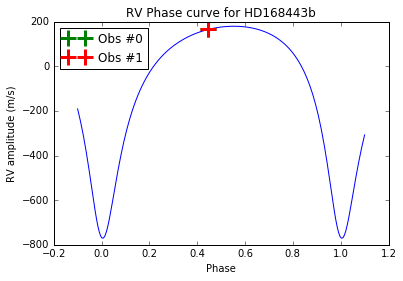

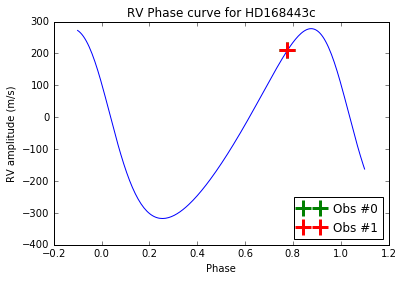

In [115]:
RV_calculations(times_dict, params_dict)

In [62]:
RV_HD30501 = RV_from_params(HD30501_times, HD30501_params, use_offset=False)
print(HD30501_times)
print(RV_HD30501)



[2456024.505902, 2456140.88716, 2456141.86633, 2456145.904258]
[-246.88768364 -122.27137959 -121.21000561 -116.82986697]


[ 16114.81674]
[-482.37561097]


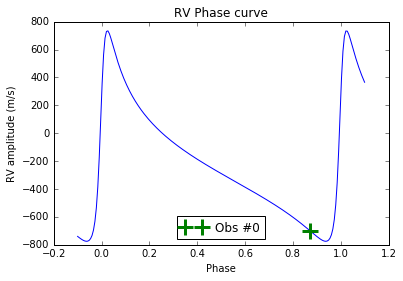

In [65]:
RV_HD4747 = RV_from_params(HD4747_times, HD4747_params, use_offset=False)
print(np.array(HD4747_times) - 2440000)
print(RV_HD4747)

plot_RV_phase_curve(HD4747_params, t_vals=HD4747_times, name="HD4747")


In [64]:
plot_RV_phase_curve(HD202206b_params, t_vals=HD202206_times, use_offset=False, name="HD202206b")
plot_RV_phase_curve(HD202206c_params, t_vals=HD202206_times, use_offset=False, name="HD202206c")

TypeError: plot_RV_phase_curve() got an unexpected keyword argument 'use_offset'

used ajplanet
used ajplanet
used ajplanet


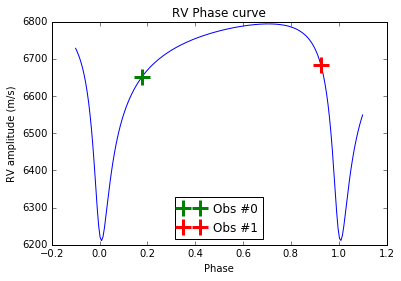

In [25]:
plot_RV_phase_curve(HD211847_params, t_vals=HD211847_times, use_offset=False, name="HD211847")

In [66]:
plot_RV_phase_curve(HD162020_params, t_vals=HD162020_times, use_offset=False, name="HD162020")

TypeError: plot_RV_phase_curve() got an unexpected keyword argument 'use_offset'

## Testing Functions

In [67]:
test_rv_curves(HD30501_times, HD30501_params)
test_rv_curves(HD162020_times, HD162020_params)
test_rv_curves(HD202206_times, HD202206b_params)
test_rv_curves(HD202206_times, HD202206c_params)
test_rv_curves(HD211847_times, HD211847_params)
test_rv_curves(HD4747_times, HD4747_params)
test_rv_curves(HD167665_times, HD167665_params)
test_rv_curves(HD168443_times, HD168443b_params)
test_rv_curves(HD168443_times, HD168443c_params)


Ajplanet RVs = [-246.88768364 -122.27137959 -121.21000561 -116.82986697]
Python RVs   = [-246.88768364 -122.27137959 -121.21000561 -116.82986697]
Ajplanet RVs = [-1258.28312777 -1251.52542645]
Python RVs   = [-1258.28312842 -1251.5254267 ]
Ajplanet RVs = [ -84.45732826 -103.1758047   -66.71647183]
Python RVs   = [ -84.45733491 -103.17581379  -66.71647668]
Ajplanet RVs = [ 19.019063    19.13201534  18.90792277]
Python RVs   = [ 19.01906301  19.13201534  18.90792277]
Ajplanet RVs = [-37.78937923  -6.34781552]
Python RVs   = [-37.78938112  -6.34781552]
Ajplanet RVs = [-482.37561097]
Python RVs   = [-482.37561322]
Ajplanet RVs = [-737.64314371 -737.65153864 -740.16865358]
Python RVs   = [-737.64314434 -737.65153927 -740.16865421]
Ajplanet RVs = [ 211.40576895  211.49986415]
Python RVs   = [ 211.40576895  211.49986415]
Ajplanet RVs = [ 256.45003189  256.46333491]
Python RVs   = [ 256.45003189  256.46333491]


In [68]:
%timeit aj_rv = pl_rv_array(HD30501_times, *HD30501_params) # *unpacks parameters from list
    
%timeit py_rv = rv_curve_py(HD30501_times, *HD30501_params) # ajplanet version is 15 X faster 

The slowest run took 6.58 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.27 µs per loop
10000 loops, best of 3: 59.8 µs per loop


In [74]:
# Radial Velocity cahnges over observation 


__ = Obs_RV_error(HD30501_times, HD30501_params, name="HD30501")
__ = Obs_RV_error(HD162020_times, HD162020_params, name="HD162020")



RV change over observation [ 0.02066453  0.02107387  0.02107985  0.02110496] m/s
RV change over observation [ 5.42134508  5.5697078 ] m/s


In [ ]:
# Test RV determination 

# Get parameters for star and taget
Red_JD = 2400000
#hd30501
mean_val = 23.710 # +- 0.017
Period = 2073.6   # +3 - 2.9 days
e = 0.741         # +_ 0.04
K1 = 1703.1       #+- 26  ms^-1
Tau = 53851.5      # +- 3 JD    Note: I think this is tau but I am not sure. 
omega = 70.4 * np.pi/180     # +- 0.7 deg

for ti in np.array([2456024.505902, 2456140.887153, 2456141.866329, 2456145.904258]) - Red_JD:
   # Calculate Mean anomaly:
   M_anomaly = meananomaly(ti, Tau, Period)
   #print("Mean Anomaly = {}".format(M_anomaly))

   # Determine true anomaly from mean anomaly
   true_anomaly = trueanomaly(M_anomaly, e)
   #print("Daiz true anomaly = {0}".format(true_anomaly))
   #nu goes into RV equations

   # Now Calculalte the RV
   RV = mean_val + K1 *(np.cos(true_anomaly + omega) + e * np.cos(omega))

   print("RV value {0} ms^-1 at time {1} JD*".format( RV ,  ti ))

In [ ]:

times = np.linspace(Tau, Tau+Period, 1000)

M_anomalies = Mean_Anomaly(times, Tau, Period)



In [ ]:

plt.plot(M_tests-M_anomalies)
plt.title("Differences between M_tests and M_anomalies")
plt.show()
#print(lmfit.report_fit(out))

T_anomalies = True_Anomaly(E_anomalies, e)
T_anomalies2 = True_Anomaly2(E_anomalies, e)
T_anomalies3 = True_Anomaly3(E_anomalies, e)
T_anomalies4 = True_Anomaly4(E_anomalies, e)

rod_true = trueanomaly(M_anomalies, e)
print("done")

In [ ]:
#print(T_anomalies)
#print(T_anomalies2)
#print(T_anomalies3)
#plt.plot(times, T_anomalies, label="1")
#plt.plot(times, T_anomalies2, label="2")
#plt.show()

In [ ]:
RVs_1 = Radial_velocity(mean_val, K1, T_anomalies, omega, e)
RVs_2 = Radial_velocity(mean_val, K1, T_anomalies2, omega, e)
RVs_3 = Radial_velocity(mean_val, K1, T_anomalies3, omega, e)
RVs_4 = Radial_velocity(mean_val, K1, T_anomalies4, omega, e)
RVs_true = Radial_velocity(mean_val, K1, rod_true, omega, e)

In [ ]:
# Test ajplanet comparision

#mean_val, K1, T_anomalies4, omega, e
#ajplanet_rvs = rv_curve(t, gamma,K,omega,ecc,to,P)
ajplanet_rvs = rv_curve(times, mean_val, K1, omega, e, Tau, Period)

print(rv_curve(HD30501_times, mean_val, K1, omega, e, Tau, Period))

In [ ]:
plt.plot((times-Tau) / Period, RVs_1, label="1")
plt.plot((times-Tau) / Period, RVs_2,'+', label="2")
plt.plot((times-Tau) / Period, RVs_3, 'o', label="3")
plt.plot((times-Tau) / Period, RVs_4, "--", label="4")
plt.plot((times-Tau) / Period, RVs_true, "--", label="4")
#plt.plot((times-Tau) / Period, ajplanet_rvs, "k*", label="ajplanet")
plt.title("Radial Velocities")
plt.legend(loc=0)
plt.show()

In [ ]:
#plt.plot(T_anomalies, RVs_1)
#plt.plot(T_anomalies2, RVs_2)
#plt.show()

In [ ]:

# My Values are not good atm when compaing to rvcurve. 

In [ ]:
# Try thre true anomaly given by the lecuture on facebook.

In [ ]:
## Old code to caluclate true anomaly from mean anomaly



